In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
categoria = 'apariencia'

In [3]:
lectura = '../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_' + categoria + '_balance.csv'
data = pd.read_csv(lectura)

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,full_text,label,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel
0,0,0,[] proximamente rd jodido el4tobate,1,0,0,0,0,0,0
1,1,1,jajajaja acomplejado guerito rockero ja facil ...,1,0,0,0,0,0,0
2,2,2,momentos cuenta contados dedos personas sincer...,1,0,0,0,0,0,0
3,3,3,guerito,1,0,0,0,0,0,0
4,4,4,restriccion preparado casos covid-19 suben 15 ...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
107003,80251,267508,puto,0,0,0,0,0,1,0
107004,80252,419933,editores bbc preguntaron peliculas saldrian re...,0,0,0,0,0,0,0
107005,80253,132316,ufff asqueroso donacion comentarios empezo pon...,0,0,0,1,0,0,0
107006,80254,725289,jajjajaja,0,0,0,0,0,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [6]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(21402, 300)

In [7]:
import pickle as pickle

carga_modelo = '../modelos/modelo_capa2_' + categoria +'.p'
pickleFile = open(carga_modelo, 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [8]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [9]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[15904,   147],
       [  746,  4605]])

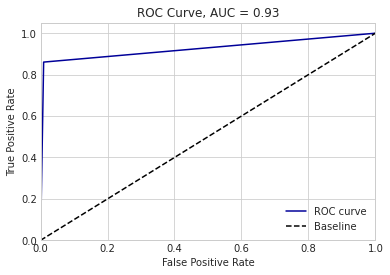

In [10]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [11]:
metrics.f1_score(y_true, y_prob)

0.9116104127486885

In [12]:
metrics.recall_score(y_true, y_prob)

0.8605868062044477